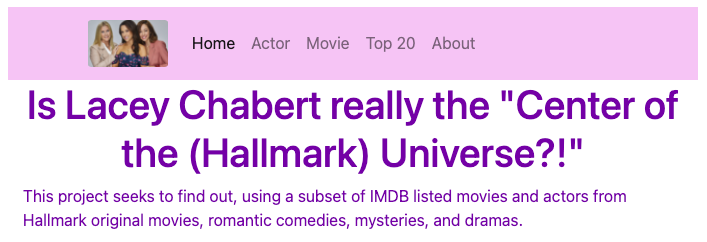

# **Import modules to handle dataframes, plotting, graphing centrality, and shortest path**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors

# **Load movie data into dataframes, and drop unwanted rows**

In [2]:
local_file = 'watchlist.txt'
header_field = ['tconst']
watchlist_info = pd.read_csv(local_file, names=header_field)
watchlist = []
watchlist = watchlist_info['tconst'].tolist() # refactor this to load direct to list, don't need a df

In [3]:
local_file = 'movie_info.csv'
movie_info = pd.read_csv(local_file, sep='\t')

In [4]:
movie_info = movie_info[movie_info['tconst'].isin(watchlist) == True]  # drop movies not on/by Hallmark

In [5]:
local_file = 'cast_crew_info.csv'
cast_crew_info = pd.read_csv(local_file, sep='\t')

In [6]:
actorlist = cast_crew_info['nconst'].tolist()  # all the Hallmark actors
actorlist = list(set(actorlist))

In [7]:
cast_crew_info = cast_crew_info[cast_crew_info['nconst'].isin(actorlist) == True]  # drop people not in Hallmark

In [8]:
local_file = 'movie_cast_crew.csv'
movie_cast_crew = pd.read_csv(local_file, sep='\t')

In [9]:
movie_cast_crew = movie_cast_crew[movie_cast_crew['tconst'].isin(watchlist) == True]  # drop non-Hallmark related

In [10]:
unwantedValues = ['director', 'writer', 'producer', 'composer', 'cinematographer', 'editor',
                  'production_designer', 'self']  # leaves actor, actress, writer, producer, director categories

In [11]:
movie_cast_crew = movie_cast_crew[movie_cast_crew['category'].isin(unwantedValues) == False] 
# keep actor, actress rows

In [12]:
movielist = movie_cast_crew['tconst'].tolist()  # all the Hallmark movies
movielist = list(set(movielist))

# **Create lookup dictionaries for all four tables**

In [13]:
df = movie_cast_crew.groupby('nconst')['tconst'].apply(list).reset_index(name="movieList")

In [14]:
nm_tt = dict(zip(df.nconst, df.movieList))  # list of movies each actor starred in

In [15]:
df = movie_cast_crew.groupby('tconst')['nconst'].apply(list).reset_index(name="actorList")

In [16]:
tt_nm = dict(zip(df.tconst, df.actorList))  # list for dictionary lookup of actors in a movie

In [17]:
df = cast_crew_info  # source of ID no, full name, birth year, death year, etc.

In [18]:
nm_name = dict(zip(df.nconst, df.primaryName))  # create a lookup dictionary

In [19]:
df = movie_info  # includes title, release year, runtime, ratings, num votes

In [20]:
tt_title = dict(zip(df.tconst, df.primaryTitle)) # create lookup table

In [21]:
title_tt = dict(zip(df.primaryTitle, df.tconst))  # create a dictionary mapping movie titles to codes

In [22]:
tt_rating = dict(zip(df.tconst, df.averageRating)) # create lookup table

In [23]:
title_rating = dict(zip(df.primaryTitle, df.averageRating)) # create lookup table

# **Analyze movie data using basic visualizations**

In [24]:
%matplotlib inline

In [25]:
cast_crew_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2514 entries, 0 to 2513
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nconst       2514 non-null   object
 1   primaryName  2514 non-null   object
 2   birthYear    2514 non-null   object
 3   deathYear    2514 non-null   object
dtypes: object(4)
memory usage: 98.2+ KB


In [26]:
cast_crew_info.head()  # mean age of actors/actresses could be a feature for analysis 

,nconst,primaryName,birthYear,deathYear
0,nm0000137,Bo Derek,1956,\N
1,nm0000145,Sherilyn Fenn,1965,\N
2,nm0000157,Linda Hamilton,1956,\N
3,nm0000162,Anne Heche,1969,\N
4,nm0000176,Nastassja Kinski,1961,\N


In [27]:
movie_cast_crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4858 entries, 0 to 4857
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tconst    4858 non-null   object
 1   nconst    4858 non-null   object
 2   category  4858 non-null   object
dtypes: object(3)
memory usage: 151.8+ KB


In [28]:
movie_cast_crew.head()  # could refactor and keep director, cinematographer, and writer in results

,tconst,nconst,category
0,tt0102842,nm0000335,actress
1,tt0102842,nm0000686,actor
2,tt0102842,nm0709634,actress
3,tt0102842,nm0825555,actress
4,tt0108159,nm0000335,actress


In [29]:
movie_info.head()  # genres could be feature for research, maybe seasonal feature also (Christmas espec.)

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0102842,tvMovie,"Sarah, Plain and Tall",1991,98,"Drama,Family,Romance",7.3,2160
1,tt0108159,tvMovie,Skylark,1993,95,Drama,7.2,1014
2,tt0140340,tvMovie,The Love Letter,1998,99,"Fantasy,Romance",7.2,2104
3,tt0184799,tvMovie,Ordinary Miracles,2005,85,Drama,6.4,531
4,tt0192573,tvMovie,"Sarah, Plain & Tall: Winter's End",1999,95,Drama,6.8,955


In [30]:
df = movie_info  #let's start with the movie database

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 0 to 1179
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1180 non-null   object 
 1   titleType       1180 non-null   object 
 2   primaryTitle    1180 non-null   object 
 3   startYear       1180 non-null   object 
 4   runtimeMinutes  1180 non-null   int64  
 5   genres          1180 non-null   object 
 6   averageRating   1180 non-null   float64
 7   numVotes        1180 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 83.0+ KB


In [32]:
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce') #convert to float
df['startYear'] = df['startYear'].astype("Int64") #then back to integer (refactor later)

In [33]:
df.info()  #that's better!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 0 to 1179
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1180 non-null   object 
 1   titleType       1180 non-null   object 
 2   primaryTitle    1180 non-null   object 
 3   startYear       1175 non-null   Int64  
 4   runtimeMinutes  1180 non-null   int64  
 5   genres          1180 non-null   object 
 6   averageRating   1180 non-null   float64
 7   numVotes        1180 non-null   int64  
dtypes: Int64(1), float64(1), int64(2), object(4)
memory usage: 84.1+ KB


In [34]:
plt.rcParams["figure.figsize"] = (8,4)

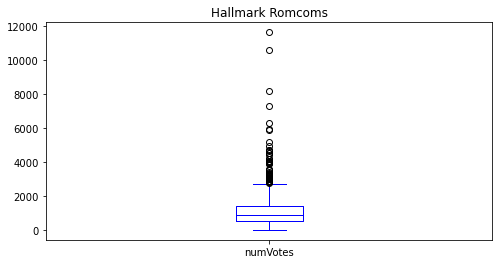

In [35]:
df.numVotes.plot(kind='box', title='Hallmark Romcoms', color='b');  #older, more popular probably get more votes

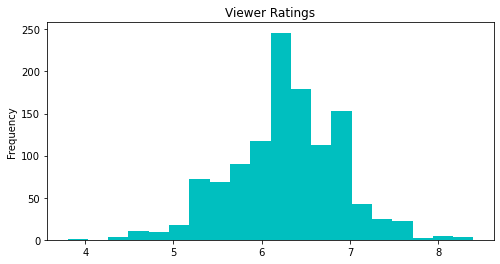

In [36]:
df.averageRating.plot(kind='hist',
                      title='Viewer Ratings',
                      color='c',
                      bins=20);  # most people rate movies between 5 and 7, mostly in 6 range

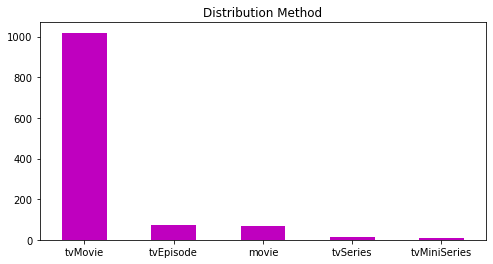

In [37]:
df.titleType.value_counts().plot(kind='bar',
                                 rot=0,
                                 title='Distribution Method',
                                 color='m');  # could probably drop lowest categories - should be more tvSeries?

In [38]:
df.groupby(['titleType']).agg({ 'numVotes': 'mean', 'averageRating': 'mean', 'runtimeMinutes': 'median' }) 

,numVotes,averageRating,runtimeMinutes
titleType,,,
movie,747.362319,5.763768,89.0
tvEpisode,772.597222,6.761111,84.0
tvMiniSeries,296.000000,7.125000,80.0
tvMovie,1157.913641,6.250049,85.0
tvSeries,867.750000,7.400000,80.0


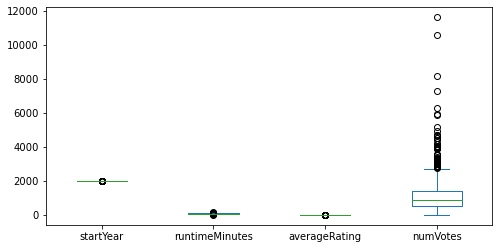

In [39]:
df.plot(kind='box');

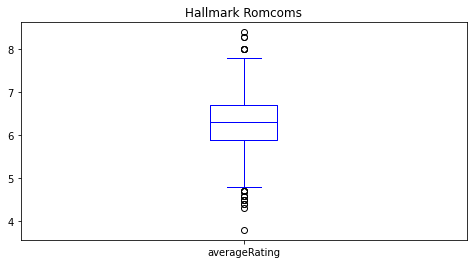

In [40]:
df.averageRating.plot(kind='box', title='Hallmark Romcoms', color='b');  # mirrors what we saw in bar graph

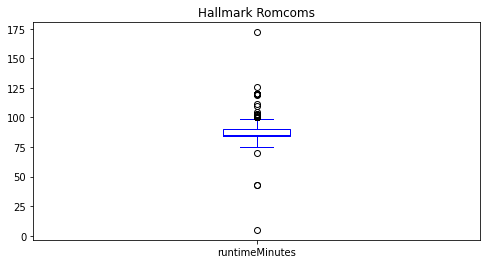

In [41]:
df.runtimeMinutes.plot(kind='box', title='Hallmark Romcoms', color='b');

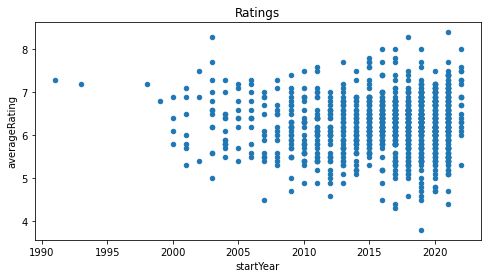

In [42]:
df.plot.scatter(x='startYear', y='averageRating', title="Ratings");  # social media? COVID? streaming?

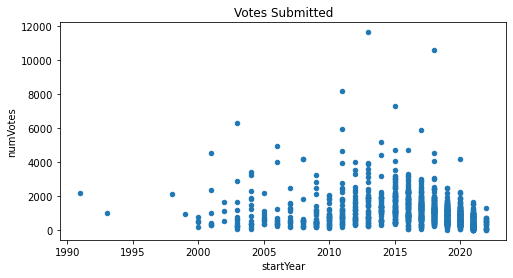

In [43]:
df.plot.scatter(x='startYear', y='numVotes', title="Votes Submitted"); # less votes, more movies?

In [44]:
annual_volume = pd.crosstab(df.startYear, df.titleType)[-14:-1]  # movies produced in recent years

Text(0.5, 1.0, 'Production Increase\n')

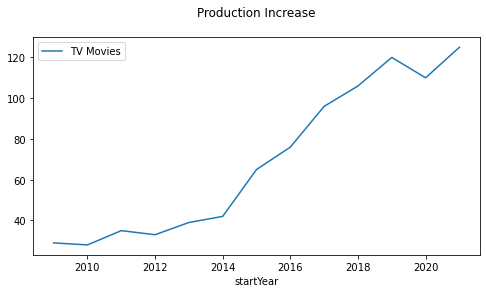

In [45]:
annual_volume.tvMovie.plot(kind='line')
annual_volume.index.names = ['Year']  # change the index for graph
plt.legend(['TV Movies'])
plt.title('Production Increase\n')

In [46]:
pd.crosstab(df.startYear, df.titleType)[-14:-1]

titleType,movie,tvEpisode,tvMiniSeries,tvMovie,tvSeries
startYear,,,,,
2009,0,0,0,29,0
2010,0,0,0,28,0
2011,1,0,0,35,0
2012,0,0,0,33,0
2013,0,1,0,39,1
2014,0,1,0,42,0
2015,2,6,2,65,1
2016,7,7,1,76,1
2017,9,8,3,96,0


In [47]:
annual_ratings = df.groupby(['startYear']).agg({ 'averageRating': 'median'})[-14:-1]   # recent annual production
annual_ratings.columns = ["Avg Rating"]  # change the name for graph
annual_ratings.index.names = ['Year']  # change the index for graph
annual_ratings

,Avg Rating
Year,
2009,6.20
2010,5.95
2011,6.10
2012,6.00
2013,6.20
2014,6.10
2015,6.35
2016,6.40
2017,6.30


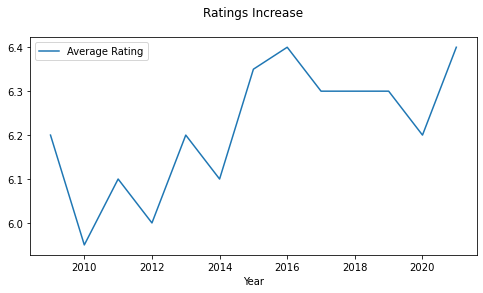

In [48]:
annual_ratings.plot(kind='line')
plt.legend(['Average Rating'])
plt.title('Ratings Increase\n');

# **Graph network plot and determine centrality**

In [49]:
titles = watchlist

In [50]:
G = nx.Graph()  # prototype for logic in main project module
edge_attribute_dict = {}
for name_ID, titles in nm_tt.items():
    G.add_node(name_ID)  # save people as nodes
    for title in titles:
        for name_ID2, titles2 in nm_tt.items():
            if (title in titles2) and (titles2 != titles):
                G.add_edge(name_ID, name_ID2)  # save movies as edges
                name_ID_tuple = tuple(sorted((name_ID, name_ID2)))
                if name_ID_tuple not in edge_attribute_dict:
                    edge_attribute_dict[name_ID_tuple] = 1
                else:
                    edge_attribute_dict[name_ID_tuple] += 1 # keep count of movies both starred in, for weight

In [51]:
for k,v in edge_attribute_dict.items():  # calculate centrality with weighted edges of more movies costarred in
    edge_attribute_dict[k] = {'weight':v}

In [52]:
import matplotlib.colors as mcolors   # courtesy of aksakalli.github.io
pos = nx.spring_layout(G, seed=675)
def draw(G, pos, measures, measure_name):  # use this function for nicer looking color graphs below
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())  # removed color line, caused errors
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [53]:
plt.rcParams["figure.figsize"] = (15, 10)  # make these three graphs a little larger for analysis

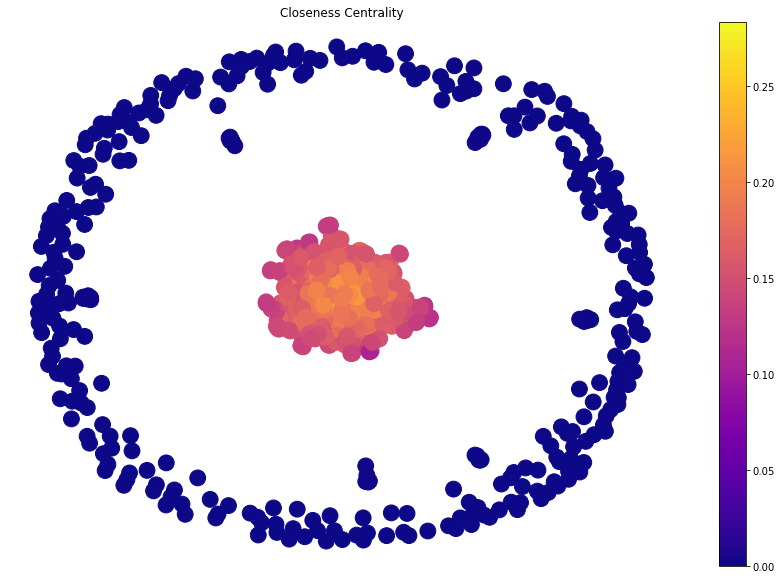

In [54]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')  # uses draw function coded above

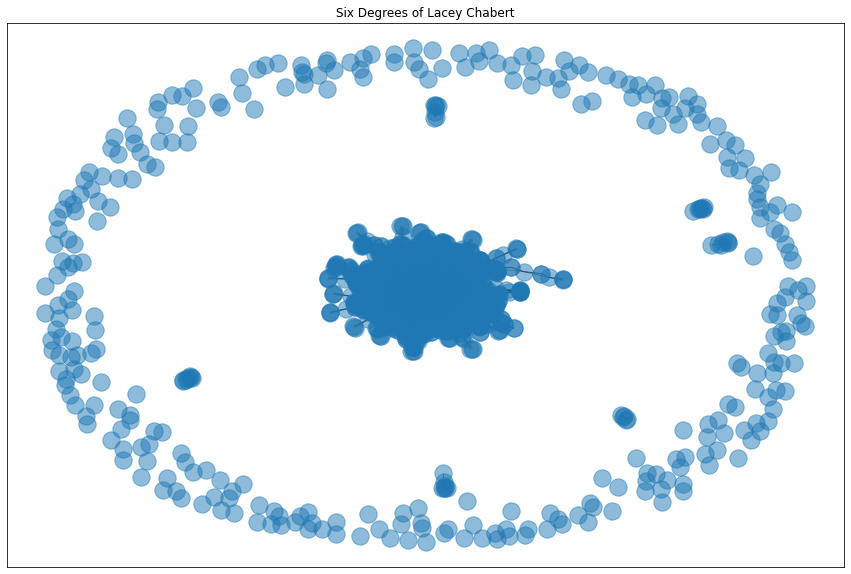

In [55]:
labels = {n:n for n in G.nodes()}
plt.title('Six Degrees of Lacey Chabert')
nx.draw_networkx(G, alpha=0.5, labels=labels, with_labels=False)

In [56]:
between_ity = nx.betweenness_centrality(G)  # comfirms general results of main prgoject, few variations in Top 20
[(nm_name[x], between_ity[x]) for x in sorted(between_ity, key=between_ity.get, reverse=True)[:10]]

[('Lacey Chabert', 0.05362316706681671),
 ('Andrew W. Walker', 0.045204826119730784),
 ('Danica McKellar', 0.03206073251987482),
 ('Cindy Busby', 0.03104540650344245),
 ('Trevor Donovan', 0.030026740510035826),
 ('Candace Cameron Bure', 0.0298396557172756),
 ('Jen Lilley', 0.027290130418788253),
 ('Alison Sweeney', 0.02674565099467195),
 ('Stephen Huszar', 0.02279161174235445),
 ('Corey Sevier', 0.022630921628412456)]

In [57]:
close_ity = nx.closeness_centrality(G)  # not as useful without removing titles from list
[(nm_name[x], close_ity[x]) for x in sorted(close_ity, key=close_ity.get, reverse=True)[:10]]

[('Lacey Chabert', 0.2830413024643861),
 ('Andrew W. Walker', 0.27794714842627943),
 ('Danica McKellar', 0.27015160891569706),
 ('Autumn Reeser', 0.26948928163684405),
 ('Barbara Niven', 0.2677516376085223),
 ('Alison Sweeney', 0.2671773918887442),
 ('Candace Cameron Bure', 0.2650927335607713),
 ('Victor Webster', 0.26479221749608567),
 ('Christopher Russell', 0.26333690513949787),
 ('Tyler Hynes', 0.26318854631970096)]

# **Actor analysis -- who starred in the most movies?**

In [58]:
df = movie_info

In [59]:
name_count = {}  # create a dictionary to store the sorted movie count by actor
for actor in actorlist:
    name_count[nm_name[actor]] = len(nm_tt[actor])  # count movies for each actor, store in dictionary
sorted_dict = sorted([(value, key)
 for (key, value) in name_count.items()])  # sort the dictionary
df = pd.DataFrame(sorted_dict, columns =["Movies", "Actor"])  # rename the columns for display
df = df.sort_values(by='Movies', ascending=False) # reverse sort the movie count so we can grab top 10 (or more)
df[:10]  # Sure enough, data confirms Lacey Chabert is the Queen of RomComs at Hallmark!

,Movies,Actor
2512,32,Lacey Chabert
2511,22,Andrew W. Walker
2510,21,Candace Cameron Bure
2509,21,Brennan Elliott
2508,18,Danica McKellar
2507,18,Cindy Busby
2506,18,Alison Sweeney
2505,17,Niall Matter
2504,17,Jill Wagner
2503,17,Eric Mabius


# High percentile actors, very few have this many movies

In [60]:
print(df['Movies'].quantile(q=0.990), df['Movies'].quantile(q=0.993), df['Movies'].quantile(q=0.996))

13.0 14.416000000000167 16.0


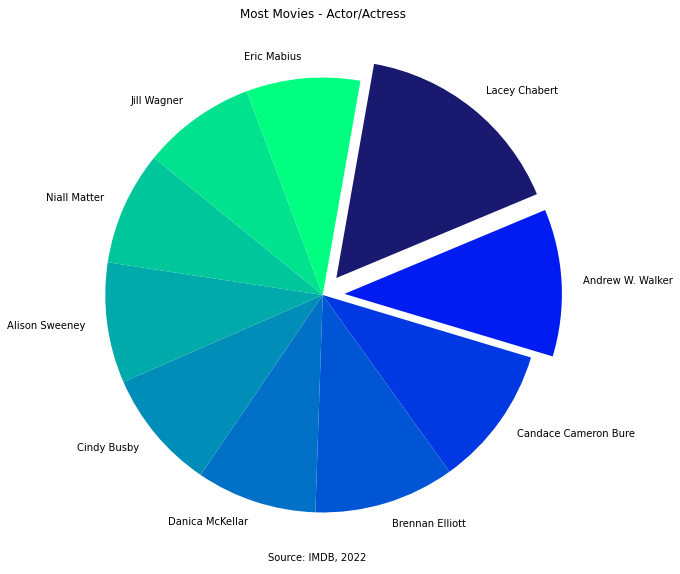

In [61]:
top_10 = df[:10]
values = list(top_10['Movies'])  # let's chart the Top 10 on a pie chart, based on # movies starred in
labels = list(top_10['Actor'])
plt.title('Most Movies - Actor/Actress')
plt.annotate(r'Source: IMDB, 2022', xy=(.4, .01), xycoords='axes fraction')  # throw in a source attribution
colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8',\
          '#00AAAA','#00C69C','#00E28E','#00FF80']  # use a blue-green spectrum for the wheel
explode = (.1, .1, 0, 0, 0, 0, 0, 0, 0, 0)  # callout the top two, female and male
plt.pie(values, labels=labels, explode=explode, colors=colors, counterclock=False, shadow=False, startangle=80)
plt.show()

# Rating Analysis, for actor/actress with at least 20 movies

In [62]:
name_rating = {}  # create a dictionary to store the sorted movie count by actor
for actor in actorlist:
    sum = 0.0
    count = 0
    movies = nm_tt[actor]
    count = len(movies)
    for each in range(len(movies)):
        try:
            sum += tt_rating[movies[each]]
        except:
            count -= 1
        if count > 20:
            name_rating[nm_name[actor]] = sum/count  # count movies for each actor, store in dictionary
sorted_dict = sorted([(value, key)
 for (key, value) in name_rating.items()])  # sort the dictionary
df = pd.DataFrame(sorted_dict, columns =["Rating", "Actor"])  # rename the columns for display
df = df.sort_values(by='Rating', ascending=False) # reverse sort the movie count so we can grab top 10 (or more)
df[:10]  # Sure enough, data confirms Lacey Chabert is the Queen of RomComs at Hallmark, based on volume

,Rating,Actor
3,6.728125,Lacey Chabert
2,6.680952,Candace Cameron Bure
1,6.633333,Brennan Elliott
0,6.531818,Andrew W. Walker


# and for actor/actress with at least 15 movies

In [63]:
name_rating = {}  # create a dictionary to store the sorted movie count by actor
for actor in actorlist:
    sum = 0.0
    count = 0
    movies = nm_tt[actor]
    count = len(movies)
    for each in range(len(movies)):
        try:
            sum += tt_rating[movies[each]]
        except:
            count -= 1
        if count > 15:
            name_rating[nm_name[actor]] = sum/count  # count movies for each actor, store in dictionary
sorted_dict = sorted([(value, key)
 for (key, value) in name_rating.items()])  # sort the dictionary
df = pd.DataFrame(sorted_dict, columns =["Rating", "Actor"])  # rename the columns for display
df = df.sort_values(by='Rating', ascending=False) # reverse sort the movie count so we can grab top 10 (or more)
df[:10]  # There are some higher rated actors/actresses with less movies

,Rating,Actor
14,7.537500,Yan-Kay Crystal Lowe
13,7.435294,Eric Mabius
12,7.038889,Alison Sweeney
11,6.917647,Jill Wagner
10,6.806250,Barbara Niven
9,6.806250,Autumn Reeser
8,6.735294,Niall Matter
7,6.728125,Lacey Chabert
6,6.718750,Lori Loughlin
5,6.680952,Candace Cameron Bure


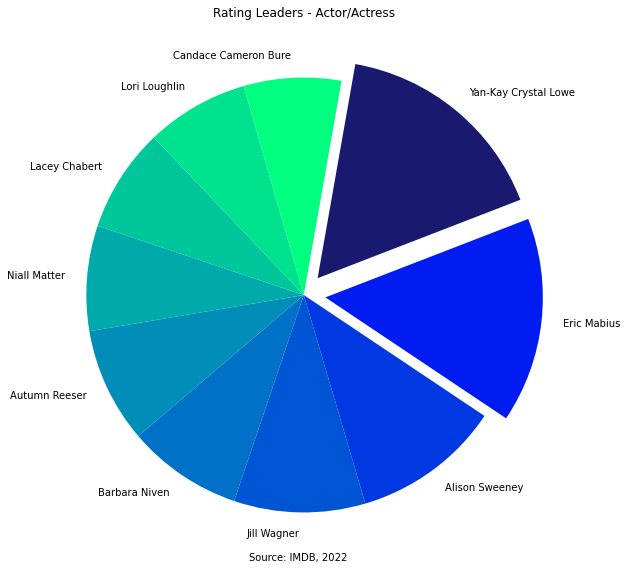

In [64]:
top_10 = df[:10]
values = list(top_10['Rating']-6)  # let's chart Top 10 on a pie chart, based on rating above baseline of 6
labels = list(top_10['Actor'])
plt.title('Rating Leaders - Actor/Actress')
plt.annotate(r'Source: IMDB, 2022', xy=(.4, .01), xycoords='axes fraction')  # throw in a source attribution
colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8',\
          '#00AAAA','#00C69C','#00E28E','#00FF80']  # use a blue-green spectrum for the wheel
explode = (.1, .1, 0, 0, 0, 0, 0, 0, 0, 0)  # callout the top two, female and male
plt.pie(values, labels=labels, explode=explode, colors=colors, counterclock=False, shadow=False, startangle=80)
plt.show()

# and for actor/actress with at least 10 movies

In [65]:
name_rating = {}  # create a dictionary to store the sorted movie count by actor
for actor in actorlist:
    sum = 0.0
    count = 0
    movies = nm_tt[actor]
    count = len(movies)
    for each in range(len(movies)):
        try:
            sum += tt_rating[movies[each]]
        except:
            count -= 1
        if count > 10:
            name_rating[nm_name[actor]] = sum/count  # count movies for each actor, store in dictionary
sorted_dict = sorted([(value, key)
 for (key, value) in name_rating.items()])  # sort the dictionary
df = pd.DataFrame(sorted_dict, columns =["Rating", "Actor"])  # rename the columns for display
df = df.sort_values(by='Rating', ascending=False) # reverse sort the movie count so we can grab top 10 (or more)
df[:10]  # Some high scoring actors, but not very well known

,Rating,Actor
41,7.784615,Kristin Booth
40,7.784615,Geoff Gustafson
39,7.537500,Yan-Kay Crystal Lowe
38,7.435294,Eric Mabius
37,7.038889,Alison Sweeney
36,6.980000,Kristoffer Polaha
35,6.917647,Jill Wagner
34,6.833333,Catherine Bell
33,6.807143,Steve Bacic
32,6.806250,Barbara Niven


# and for actor/actress with at least 5 movies

In [66]:
name_rating = {}  # create a dictionary to store the sorted movie count by actor
for actor in actorlist:
    sum = 0.0
    count = 0
    movies = nm_tt[actor]
    count = len(movies)
    for each in range(len(movies)):
        try:
            sum += tt_rating[movies[each]]
        except:
            count -= 1
        if count > 5:
            name_rating[nm_name[actor]] = sum/count  # count movies for each actor, store in dictionary
sorted_dict = sorted([(value, key)
 for (key, value) in name_rating.items()])  # sort the dictionary
df = pd.DataFrame(sorted_dict, columns =["Rating", "Actor"])  # rename the columns for display
df = df.sort_values(by='Rating', ascending=False) # reverse sort the movie count so we can grab top 10 (or more)
df[:10]  # range is flattening as we include more actors in selection

,Rating,Actor
136,7.784615,Kristin Booth
135,7.784615,Geoff Gustafson
134,7.537500,Yan-Kay Crystal Lowe
133,7.435294,Eric Mabius
132,7.300000,Robin Thomas
131,7.137500,Preston Vanderslice
130,7.128571,Lexa Doig
129,7.050000,Catherine Disher
128,7.038889,Alison Sweeney
127,7.014286,Chris Potter


# Let's Refactor, with Directors and Writers Included

In [67]:
local_file = 'cast_crew_info2.csv'  # have to use different file, because they're filtered out in romcomPrep now
cast_crew_info = pd.read_csv(local_file, sep='\t')

In [68]:
crewlist = cast_crew_info['nconst'].tolist()  # all the Hallmark actors
crewlist = list(set(crewlist))

In [69]:
cast_crew_info = cast_crew_info[cast_crew_info['nconst'].isin(crewlist) == True]  # drop people not in Hallmark

In [70]:
local_file = 'movie_cast_crew2.csv'  # have to use different file, because they're filtered out in romcomPrep now
movie_cast_crew = pd.read_csv(local_file, sep='\t')

In [71]:
movie_cast_crew = movie_cast_crew[movie_cast_crew['tconst'].isin(watchlist) == True]  # drop non-Hallmark related

In [72]:
unwantedValues = ['producer', 'composer', 'cinematographer', 'editor', 'production_designer', 
                  'self']  # leaves actor, actress, writer, director categories

In [73]:
movie_cast_crew = movie_cast_crew[movie_cast_crew['category'].isin(unwantedValues) == False] 
# keep actor, actress, director, writer rows

In [74]:
movielist = movie_cast_crew['tconst'].tolist()  # all the Hallmark movies
movielist = list(set(movielist))

# **Create lookup dictionaries for all four tables**

In [75]:
df = movie_cast_crew.groupby('nconst')['tconst'].apply(list).reset_index(name="movieList")

In [76]:
nm_tt = dict(zip(df.nconst, df.movieList))  # list of movies each person participted in

In [77]:
df = movie_cast_crew.groupby('tconst')['nconst'].apply(list).reset_index(name="crewList")

In [78]:
tt_nm = dict(zip(df.tconst, df.crewList))  # list for dictionary lookup of crew in a movie

In [79]:
df = cast_crew_info  # source of ID no, full name, birth year, death year, etc.

In [80]:
nm_name = dict(zip(df.nconst, df.primaryName))  # create a lookup dictionary

In [81]:
df = movie_info  # includes title, release year, runtime, ratings, num votes

In [82]:
tt_title = dict(zip(df.tconst, df.primaryTitle)) # create lookup table

In [83]:
title_tt = dict(zip(df.primaryTitle, df.tconst))  # create a dictionary mapping movie titles to codes

In [84]:
tt_rating = dict(zip(df.tconst, df.averageRating)) # create lookup table

In [85]:
title_rating = dict(zip(df.primaryTitle, df.averageRating)) # create lookup table

# **Let's do some similar analysis and visualization with all crew**

In [86]:
df = movie_info  #let's start with the movie database

In [87]:
name_count = {}  # create a dictionary to store the sorted movie count by actor
for crew in crewlist:
    name_count[nm_name[crew]] = len(nm_tt[crew])  # count movies for each actor, store in dictionary
sorted_dict = sorted([(value, key)
 for (key, value) in name_count.items()])  # sort the dictionary
df = pd.DataFrame(sorted_dict, columns =["Movies", "Crew Member"])  # rename the columns for display
df = df.sort_values(by='Movies', ascending=False) # reverse sort the movie count so we can grab top 10 (or more)
df[:10]  # Sure enough, Lacey Chabert is still at the top for actors, Oliver and Ingram are directors

,Movies,Crew Member
3642,33,Terry Ingram
3641,32,Ron Oliver
3640,32,Lacey Chabert
3639,28,Gregg Rossen
3638,28,Brian Sawyer
3637,28,Barbara Kymlicka
3636,27,Tippi Dobrofsky
3635,27,Neal H. Dobrofsky
3634,26,Mark Jean
3632,24,David Winning


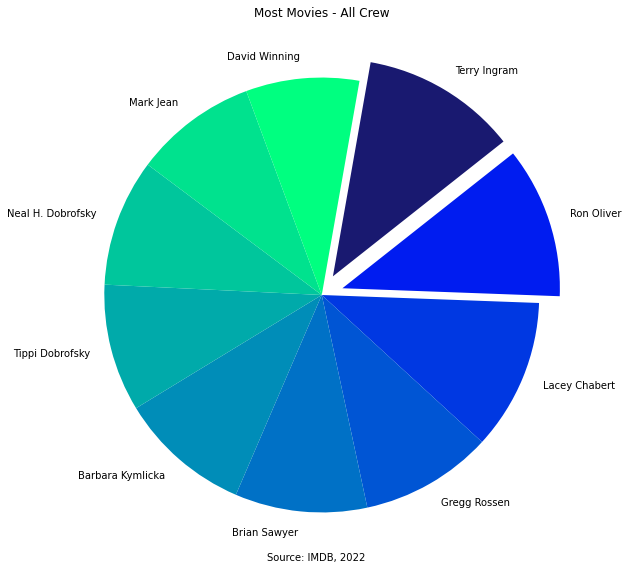

In [88]:
top_10 = df[:10]
values = list(top_10['Movies'])  # let's chart the Top 10 on a pie chart, based on num movies crew was in
labels = list(top_10['Crew Member'])
plt.title('Most Movies - All Crew')
plt.annotate(r'Source: IMDB, 2022', xy=(.4, .01), xycoords='axes fraction')  # throw in a source attribution
colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8',\
          '#00AAAA','#00C69C','#00E28E','#00FF80']  # use a blue-green spectrum for the wheel
explode = (.1, .1, 0, 0, 0, 0, 0, 0, 0, 0)  # callout the top two, female and male
plt.pie(values, labels=labels, explode=explode, colors=colors, counterclock=False, shadow=False, startangle=80)
plt.show()

## Lacey still prominent, but most other actors knocked off the list now

In [89]:
name_rating = {}  # create a dictionary to store the sorted movie count by actor
for crew in crewlist:
    sum = 0.0
    count = 0
    movies = nm_tt[crew]
    count = len(movies)
    for each in range(len(movies)):
        try:
            sum += tt_rating[movies[each]]
        except:
            count -= 1
        if count > 20:
            name_rating[nm_name[crew]] = sum/count  # count movies for each actor, store in dictionary
sorted_dict = sorted([(value, key)
 for (key, value) in name_rating.items()])  # sort the dictionary
df = pd.DataFrame(sorted_dict, columns =["Rating", "Crew Member"])  # rename the columns for display
df = df.sort_values(by='Rating', ascending=False) # reverse sort the movie count so we can grab top 10 (or more)
df[:10]  # Lacey Chabert also the Queen of RomComs (as actress) at Hallmark based on average rating!

,Rating,Crew Member
19,6.896154,Kevin Fair
18,6.728125,Lacey Chabert
17,6.680952,Candace Cameron Bure
16,6.633333,Brennan Elliott
15,6.534615,Mark Jean
14,6.531818,Andrew W. Walker
13,6.506061,Terry Ingram
12,6.477273,Gary Yates
11,6.462500,David Winning
10,6.400000,Steven R. Monroe


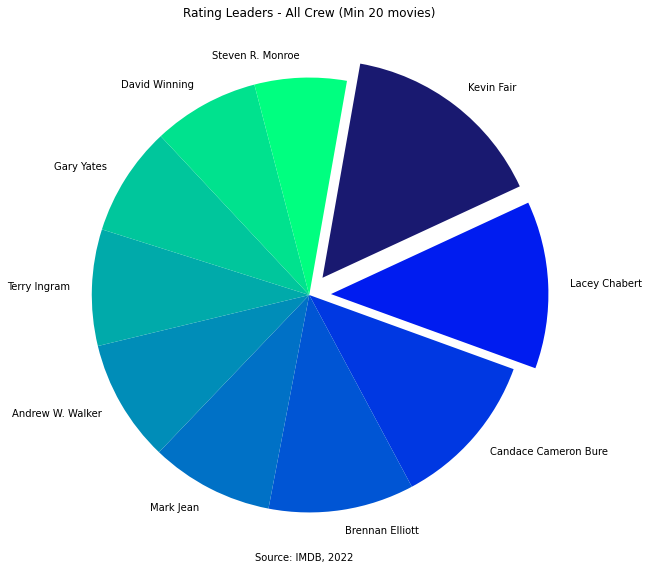

In [90]:
top_10 = df[:10]
values = list(top_10['Rating']-6)  # let's chart Top 10 on a pie chart, based on rating above baseline of 6
labels = list(top_10['Crew Member'])
plt.title('Rating Leaders - All Crew (Min 20 movies)')
plt.annotate(r'Source: IMDB, 2022', xy=(.4, .01), xycoords='axes fraction')  # throw in a source attribution
colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8',\
          '#00AAAA','#00C69C','#00E28E','#00FF80']  # use a blue-green spectrum for the wheel
explode = (.1, .1, 0, 0, 0, 0, 0, 0, 0, 0)  # callout the top two, female and male
plt.pie(values, labels=labels, explode=explode, colors=colors, counterclock=False, shadow=False, startangle=80)
plt.show()

## Looking only at those with 15-20 movies, our main actors reappear, with some directors, writers

In [91]:
name_rating = {}  # create a dictionary to store the sorted movie count by crew member
for crew in crewlist:
    sum = 0.0
    count = 0
    movies = nm_tt[crew]
    count = len(movies)
    for each in range(len(movies)):
        try:
            sum += tt_rating[movies[each]]
        except:
            count -= 1
        if count > 15:
            name_rating[nm_name[crew]] = sum/count  # count movies for each crew member, store in dictionary
sorted_dict = sorted([(value, key)
 for (key, value) in name_rating.items()])  # sort the dictionary
df = pd.DataFrame(sorted_dict, columns =["Rating", "Crew Member"])  # rename the columns for display
df = df.sort_values(by='Rating', ascending=False) # reverse sort the movie count so we can grab top 10 (or more)
df[:10]  # Alison Sweeney is more popular for actresses only starring in 10-15 movies

,Rating,Crew Member
45,7.537500,Yan-Kay Crystal Lowe
44,7.435294,Eric Mabius
43,7.038889,Alison Sweeney
42,6.917647,Jill Wagner
41,6.896154,Kevin Fair
40,6.806250,Barbara Niven
39,6.806250,Autumn Reeser
38,6.750000,Peter Benson
37,6.735294,Niall Matter
36,6.728125,Lacey Chabert


In [92]:
name_rating = {}  # create a dictionary to store the sorted movie count by crew member
for crew in crewlist:
    sum = 0.0
    count = 0
    movies = nm_tt[crew]
    count = len(movies)
    for each in range(len(movies)):
        try:
            sum += tt_rating[movies[each]]
        except:
            count -= 1
        if count > 10:
            name_rating[nm_name[crew]] = sum/count  # count movies for each crew member, store in dictionary
sorted_dict = sorted([(value, key)
 for (key, value) in name_rating.items()])  # sort the dictionary
df = pd.DataFrame(sorted_dict, columns =["Rating", "Crew Member"])  # rename the columns for display
df = df.sort_values(by='Rating', ascending=False) # reverse sort the movie count so we can grab top 10 (or more)
df[:10]  # Alison higher ratings in the 10-15 movie range. Conclusion: cast her in more movies! :)

,Rating,Crew Member
100,7.784615,Martha Williamson
99,7.784615,Geoff Gustafson
98,7.671429,Kristin Booth
97,7.537500,Yan-Kay Crystal Lowe
96,7.435294,Eric Mabius
95,7.038889,Alison Sweeney
94,6.980000,Kristoffer Polaha
93,6.917647,Jill Wagner
92,6.896154,Kevin Fair
91,6.836364,Craig Pryce


In [93]:
name_rating = {}  # create a dictionary to store the sorted movie count by crew member
for crew in crewlist:
    sum = 0.0
    count = 0
    movies = nm_tt[crew]
    count = len(movies)
    for each in range(len(movies)):
        try:
            sum += tt_rating[movies[each]]
        except:
            count -= 1
        if count > 5:
            name_rating[nm_name[crew]] = sum/count  # count movies for each crew member, store in dictionary
sorted_dict = sorted([(value, key)
 for (key, value) in name_rating.items()])  # sort the dictionary
df = pd.DataFrame(sorted_dict, columns =["Rating", "Crew Member"])  # rename the columns for display
df = df.sort_values(by='Rating', ascending=False) # reverse sort the movie count so we can grab top 10 (or more)
df[:10]  # Don't know most of these people, dedicated following from series, nationality, Brit, GoT, etc.?

,Rating,Crew Member
263,7.784615,Martha Williamson
262,7.784615,Geoff Gustafson
261,7.677778,Brandi Harkonen
260,7.671429,Kristin Booth
259,7.537500,Yan-Kay Crystal Lowe
258,7.435294,Eric Mabius
257,7.300000,Robin Thomas
256,7.200000,Lee Goldberg
255,7.150000,John Christian Plummer
254,7.137500,Preston Vanderslice
